## **`CHAPTER 14:Recursion`** 

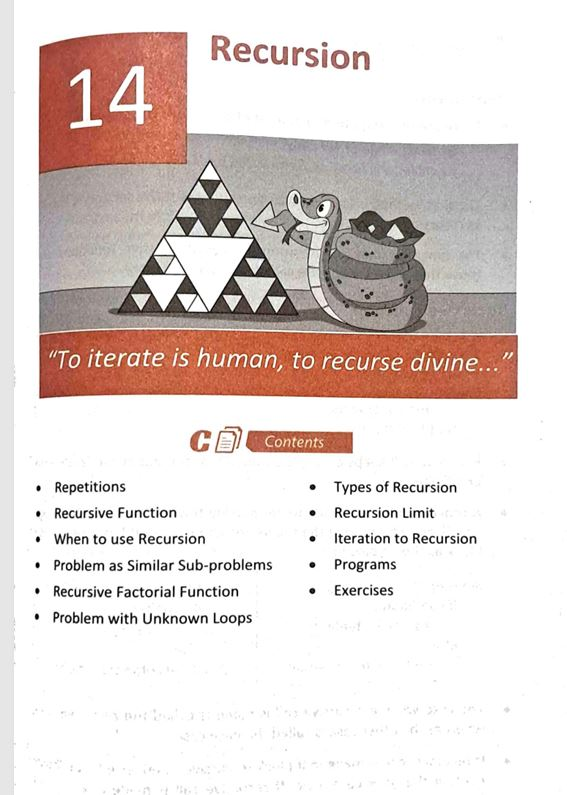

## <a id='link1'></a> **`14. Recursion`**


- [01.Repetitions](#sub14-2)  
- [02.Recursive Function](#sub14-3)  
- [03.When to use Recursion](#sub14-4)  
- [04.Problem as Similar Sub-problems](#sub14-5)  
- [05.Recursive Factorial Function](#sub14-6)  
- [06.Problem with Unknown Loops](#sub14-7)  
- [07.Types of Recursion](#sub14-8) 
- [08.Recursion Limit](#sub14-9)    
- [09.Iteration to Recursion](#sub14-10)
- [10.Programs](#sub14-11)  
- [11.Exercises](#sub14-12)

## <a id ="sub14-2"><a/>**`1. Repetitions`**
- There are two ways to repeat a set of statements in a function:
  - By using while or for loop
  - By calling the function from within itself

- The first method is known as iteration, whereas the second is known as recursion.
- The functions that use iteration are called iterative functions, and those that use recursion are called recursive functions.

## <a id ="sub14-3"><a/>**`2 .Recursive Function`**
- A Python function can be called from within its body. When we do so, it is called a recursive function
  
```python
def fun():
    # some statements
    fun()  # recursive call
```
- Recursive call keeps calling the function again and again, leading to an infinite loop.
- A provision must be made to get outside this infinite recursive loop. This is done by making the recursive call either in if block or in else block as shown below:

```python
def fun():
    if condition:
        # some statements
    else:
        fun()  # recursive call
def fun():
    if condition:
        fun()
    else:
        # some statements
- The case when a recursive call is made is called the recursive case, whereas the other case is called the base case.
- If recursive call is made in if block (recursive case), else block should contain the base case logic.
- If recursive call is made in else block (recursive case), if block should contain the base case logic.

## <a id ="sub14-4"><a/>**`3. When to Use Recursion`**

- Recursion is useful in 2 scenarios:
  - When a problem can be solved by breaking it down into similar sub-problems.
  - When a problem requires an unknown number of loop**
### Examples of problems as similar sub-pro**blems:
- Finding factorial value of a number  
- Finding sum of digits of an integer  
- Finding binary equivalent of a**ber

### Examples of unknown number of ne**sted loops:
- Finding all combinations of 1 to n, where n is received as input  
- Traversing a binary tree data structure  
- Traversing a graph d
-  structure

> In this book we would cover both sets of problems that can be solved using rsive case
        return n % 10 + sumdig(n // 10)
```

## <a id ="sub14-5"><a/>**`4. Problem as Similar Sub-problems`**

- In problems that can be solved by breaking it down into similar sub-problems, the computation of a function is described in terms of the function itself.

- For example, suppose we wish to calculate factorial value of `n`. Then:

```
n! = n * (n - 1) * (n - 2) * (n - 3) * ... * 2 * 1
```

- We can write this as:

```
n! = 1             if n = 0  
   = n * (n - 1)!  if n > 0
```

- In terms of a function, this can be written as:

```python
def factorial(n):
    if n == 0:            # base case
        return 1
    else:                 # recursive case
        return n * factorial(n - 1)
```

- If we are to obtain sum of digits of an integer `n`, then the recursive function can be written as:

```python
def sumdig(n):
    if n == 0:            # base case
        return 0
    else:                 # recursive case
        return n % 10 + sumdig(n // 10)
```
**Tips to Understand Recursive Functions**

- Following tips will help you understand recursive functions better:

  - A fresh set of variables are born during each function call — normal call as well as recursive call.

  - Variables created in a function die when control returns from a function.

  - Recursive function may or may not have a return statement.

  - Typically, during execution of a recursive function many recursive calls happen, so several sets of variables get created.  
    This increases the space requirement of the function.

  - Recursive functions are inherently slow since passing value(s) and control to a function and returning value(s) and control will slow down the execution of the function.

  - Recursive calls terminate when the base case condition is satisfied.

---

## <a id ="sub14-6"><a/>**`5. Recursive Factorial Function`**

- A simple program that calculates factorial of a given number using a recursive function is given below, followed by a brief explanation of its working:

```python
def refact(n):
    if n == 0:
        return 1
    else:
        p = n * refact(n - 1)
        return p

num = int(input('Enter any number: '))
fact = refact(num)
print('Factorial value =', fact)
```

- Suppose 2 is supplied as input, we should get the output as 2, since  
  `2!` evaluates to 2.

- It becomes easier to follow the working of a recursive function if we make copies of the function on paper and then perform a dry run of the program to follow the control flow.  
  In reality, multiple copies of function are **not** created in memory.
  
**Recursive Control Flow Explanation**

- Trace the control flow of the recursive factorial function in **Figure 14.1**.  
  Assume that we are trying to find factorial value of `2`.  
  - **Solid arrows** indicate the call to the function.  
  - **Dashed arrows** indicate return from the function.

- Note that `return 1` works only during the last call.  
  All other calls return via `return p`.

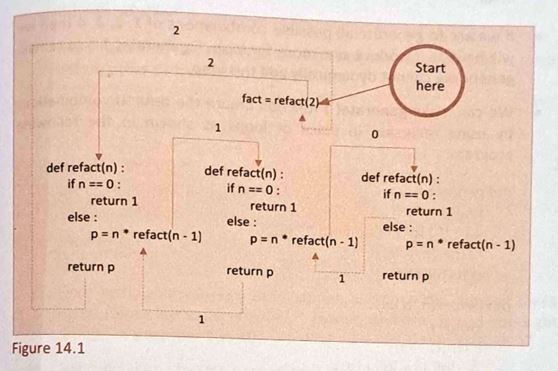

## <a id ="sub14-7"><a/>**`6. Problem with Unknown Loops`**

- If we are to define a function which generates and returns a list of lists  
  containing all possible combinations of numbers 1, 2 and 3, we can do so through the following program:

```python
def generate(n):
    lol = [[] for i in range(n ** n)]
    pos = 0
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            for k in range(1, n + 1):
                t = [i, j, k]
                lol[pos] = t
                pos += 1
    return lol
l = generator(3)
print(l)
```

**Recursive Implementation of Combinations**

```python
l = generate(3)
print(l)
```

- Since we can generate 27 combinations out of 1, 2, 3  
  (like [1, 1, 1], [1, 1, 2], ..., [3, 3, 3]), the list `lol` is set up with 27 empty lists.
- Then, through 3 `for` loops, each sub-list is generated and inserted into `lol`.

---

**Problem with Adding More Loops**

- If we are to generate all possible combinations of 1, 2, 3, 4, we would need one more `for` loop.
- If `generate()` is to remain generic, we cannot dynamically add loops.

---

**Recursive Version of generate()**

- We can make `generate()` function create the desired combinations **using recursion** in place of loops as shown below:

```python
def generate(n):
    t = []
    lol = [[] for i in range(n ** n)]
    helper(n, t, lol)
    return lol

def helper(n, t, lol):
    global j
    if len(t) == n:
        lol[j] = lol[j] + t
        j += 1
        return
    for i in range(1, n + 1):
        t.append(i)
        helper(n, t, lol)
        t.pop()

j = 0
l = generate(3)
print(l)
```

- In addition to `generate()`, we have defined the `helper()` function  
  since we wish to build each sub-list incrementally and `generate()` receives only `n`.

- After generating a sub-list like `[1, 1, 1]`, list method `pop()` has been called to remove the last `1` from this sub-list and create the next sub-list `[1, 1, 2]`.

## <a id ="sub14-8"><a/>**`7. Types of Recursion`**
---
- **Two types of recursion can exist:**
- (a) **Head recursion**
- (b) **Tail recursion**

---

- **Head Recursion**

In this type of recursion, the **recursive call is made before** other processing in the function.

```python
def headprint(n):
    if n == 0:
        return
    else:
        headprint(n - 1)
        print(n)

headprint(10)
```

**Explanation:**
- Here, recursive calls happen first, and then the printing takes place.
- The last value of `n` (i.e., 1) gets printed first.
- So, numbers get printed in the **order 1 to 10**.

---

**Tail Recursion**

In this type of recursion, **processing is done before** the recursive call.  
It is similar to a loop — the function executes all statements before making the recursive call.

```python
def tailprint(n):
    if n == 11:
        return
    else:
        print(n)
        tailprint(n + 1)

tailprint(1)
```

**Explanation:**
- Here, printing takes place first, then the recursive call is made.
- The first value of `n` (i.e., 1) gets printed first, and then recursion continues.
- So again, numbers get printed in the **order 1 to 10**.

## <a id ="sub14-9"><a/>**`8. Recursion Limit`**

- In head recursion, we don't get the result of our calculation until we have returned from every recursive call.  
  So, the state (local variables) has to be saved before making the next recursive call.  
  This results in consumption of more memory. Too many recursive calls may result in an error.

- Default recursion limit in Python is usually set to a small value (approximately, `10 ** 4`).  
  So, if we provide a large input to the recursive function, a **RecursionError** will be raised.

- The `setrecursionlimit()` function in the **sys** module permits us to set the recursion limit.  
  Once set to `10^6`, large inputs can be handled without any errors.

---

## <a id ="sub14-10"><a/>**`9. Iteration to Recursion`**

- Given below are the steps that should be followed if we are to convert an iterative function to a recursive function:

  - Use the local variables in the iterative function as parameters of the recursive function.

  - Identify the main loop in the iterative function.  
    This loop typically modifies one or more variables and returns some final value(s).

  - Write the condition in the loop as the base case and the body of the loop as the recursive case.

  - Run to check whether the recursive function achieves the desired result.

  - Remove any unnecessary variables and improve the structure of the recursive function.

##  <a id ="sub14-11"><a/>**`Problem`**

## **`Problem 14.1`** - Prime Factors using Recursion
**Problem Statement - If a positive integer is entered through the keyboard, write a recursive function to obtain the prime factors of the number.**
## **`Program`**

In [1]:
def factorize(n, i):
    if i <= n:
        if n % i == 0:
            print(i, end=', ')
            n = n // i
        else:
            i += 1
        factorize(n, i)

num = int(input('Enter a number: '))
print('Prime factors are:')
factorize(num, 2)

Enter a number:  5


Prime factors are:
5, 

# **`Tips`**
- In factorize() we keep checking, starting with 2, whether i is a factor of n (means, can i divide n exactly). If so, we print that factor, reduce n and again call factorize() recursively. If not, we increment i and call factorize() to check whether the new i is a factor of n.

## **`Problem 14.2 - Sum of Digits using Recursion`**
**Problem Statement - A positive integer is entered through the keyboard, write a recursive function to calculate sum of digits of the 5-digit number.**
## **`Program`**

In [3]:
def rsum(num):
    if num != 0:
        digit = num % 10
        num = int(num / 10)
        sum = digit + rsum(num)
    else:
        return 0
    return sum

n = int(input("Enter number: "))
rs = rsum(n)
print("Sum of digits = ", rs)

Enter number:  4534


Sum of digits =  16


# **`Tips`**
- In the rsum() function, we extract the last digit, reduce the number and call rsum() with reduced value of num. Thus if the number entered is 3256, the call becomes sum = 6 + rsum(325).

- During each call additions are kept pending, for example the addition to 6 is kept pending as the program calls rsum(325) to obtain sum of digits of 325.

- The recursive calls end when n fails to 0, whereupon the function returns a 0, because sum of digits of 0 is 0. The 0 is returned to the previous pending call, i.e., sum = 3 + rsum(0). Now sum = 3 + 0 is completed and the control reaches return s. Now the value of sum, i.e., 3 is returned to the previous call made during the pending addition of + rsum(3). This way all pending calls are completed and finally the sum of 3256 is returned.

- In short, return 0 goes to work only once (during the last call to rsum()), whereas, for all previous calls return sum goes to work

## **`Problem 14.3`** - Paper Sizes using Recursion
**Problem Statement Paper of size A0 has dimensions 1189 mm x 841 mm. Each subsequent size A(n) is defined as A(n-1) cut in half, parallel to its shorter side. Write a program to calculate and print paper sizes A0, A1, A2, ... A8 using recursion.**
## **`Program`**

In [4]:
def papersizes(i, n, l, b):
    if n != 0:
        print(f'A{i}: L = {int(l)} B = {int(b)}')
        newb = l / 2
        newl = b
        n -= 1
        i += 1
        papersizes(i, n, newl, newb)

papersizes(0, 8, 1189, 841)

A0: L = 1189 B = 841
A1: L = 841 B = 594
A2: L = 594 B = 420
A3: L = 420 B = 297
A4: L = 297 B = 210
A5: L = 210 B = 148
A6: L = 148 B = 105
A7: L = 105 B = 74


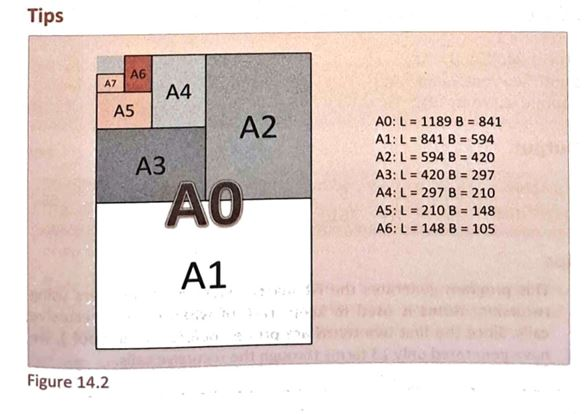


**Figure 14.2** shows different paper sizes are obtained. In function **`papersizes( )`**, i is used to obtain the digit in A0, A1, A2, etc., whereas n is used to keep track of number of times the function should be called. The moment n falls to 0, the recursive calls are stopped. Alternately, we could have dropped n and stopped recursive calls when i reaches 7.

## **`Problem 14.4 - Fibonacci Sequence using Recursion`**
Problem Statement
Write a recursive function to obtain first 15 numbers of a Fibonacci sequence. In a Fibonacci sequence the sum of two successive terms gives the third term. First few terms of the Fibonacci sequence:
```
[1   1   2   3   5   8   13   21   34   55   89...]
```
## **`Program`**

In [5]:
def Fibo(old, current, terms):
    if terms >= 1:
        new = old + current
        print(f'{new}', end = '\t')
        terms = terms - 1
        Fibo(current, new, terms)

old = 1
current = 1
print(f'{old}', end = '\t')
print(f'{current}', end = '\t')
Fibo(old, current, 13)

1	1	2	3	5	8	13	21	34	55	89	144	233	377	610	

## **`TIPS`**
- This program generates the Fibonacci sequence of numbers using recursion. terms is used to keep track of when to stop recursive calls. Since the first two terms are printed before calling Fibo(), we have generated only 13 terms through the recursive calls.

## **`Problem 14.5`**
**A positive integer is entered through the keyboard; write a function to find the binary equivalent of this number using recursion.**
## **`Program`**

In [6]:
import sys

def dec_to_binary(n):
    r = n % 2
    n = int(n / 2)
    if n != 0:
        dec_to_binary(n)
    print(r, end = '')

sys.setrecursionlimit(10 ** 6)
num = int(input('Enter the number: '))
print('The binary equivalent is:')
dec_to_binary(num)

Enter the number:  5


The binary equivalent is:
101

## **`Tips`**
- To obtain binary equivalent of a number, we have to keep dividing the dividend till it doesn’t become 0. Finally, the remainders obtained during each successive division must be written in reverse order to get the binary equivalent.
- Since the remainders are to be written in the reverse order, we start printing only when n falls to 0, otherwise we make a call to dec_to_binary() with a reduced dividend value.

## **`Problem 14.6`**
**Write a recursive function to obtain the running sum of first 25 natural numbers.**
## **`Program`**

In [7]:
def runningSum(n):
    if n == 0:
        return 0
    else:
        s = n + runningSum(n - 1)
        return(s)

max = int(input('Enter the positive largest number for running sum: '))
if max > 0:
    sum = runningSum(max)
    print(f'Running Sum: {sum}')
else:
    print('Entered number is negative')

Enter the positive largest number for running sum:  45454


Running Sum: 1033055785


# **`Tips`**

**We calculate the running sum as we calculate the factorial value, starting from n and then go on reducing it moving towards 0. We stop on reaching 0.**

# <a id ="sub14-12"><a/>**`Exercises`**

## **`[A] State whether the following statements are True or False`**

**(a) A recursive function that calls another execution instance of the same function.**
- 👉 True
- By definition, recursion means a function calling itself.

**(b) If a recursive function uses three variables a, b and c, then the same set of variables are used during each recursive call.**
- 👉 False
- Each recursive call creates a new copy of local variables in memory (stack frame). They are not the "same" variables; they are separate instances.

**(c) Multiple copies of the recursive function are created in memory.**
- 👉 True
- Each recursive call gets its own memory on the call stack until it returns.

**(d) A recursive function must contain at least 1 return statement.**
- 👉 False
- A recursive function does not always require return. For example, printing-based recursion may not return a value, only prints output.

**(e) Every iteration done using a while or for loop can be replaced with recursion.**
- 👉 True
- Recursion can simulate any iteration (though not always efficient).

**(f) Logics expressible in the form of themselves are good candidates for writing recursive functions.**
- 👉 True
- Examples: factorial, Fibonacci, tree traversals — naturally defined recursively.

**(g) Tail recursion is similar to a loop.**
- 👉 True
- Tail recursion executes in a similar manner to iteration, as no extra work is pending after the recursive call.

**(h) Infinite recursion can occur if the base case is not properly defined.**
- 👉 True
- Without a base case, the recursion never terminates and leads to a stack overflow.

**(i) A recursive function is easy to write, understand and maintain as compared to a one that uses a loop.**
- 👉 False
- While recursion may be elegant in some problems, in general loops are easier to understand and more efficient in most cases.

## **`[B] Answer the following questions:`**

**(a) Following program calculates sum of first 5 natural numbers using tail recursion and head recursion.**

In [8]:
# Recursive Function Solutions
### (a) Sum of first n natural numbers (Tail & Head Recursion)
# Head recursion
def sum_head(n):
    if n == 0:
        return 0
    return n + sum_head(n-1)

# Tail recursion
def sum_tail(n, acc=0):
    if n == 0:
        return acc
    return sum_tail(n-1, acc+n)

print("Head Recursion:", sum_head(5))
print("Tail Recursion:", sum_tail(5))

Head Recursion: 15
Tail Recursion: 15


**(b) There are three pegs labeled A, B and C. Four disks are placed on peg A. The bottom-most disk is largest, and disks go on decreasing in size with the topmost disk being smallest. The objective of the game is to move the disks from peg A to peg C, using peg B as an auxiliary peg. The rules of the game are as follows:**
- Only one disk may be moved at a time, and it must be the top disk on one of the pegs.
- A larger disk should never be placed on the top of a smaller disk.
Write a program to print out the sequence in which the disks should be moved such that all disks on peg A are finally transferred to peg C.

In [9]:
def hanoi(n, source, target, auxiliary):
    if n == 1:
        print(f"Move disk 1 from {source} to {target}")
        return
    hanoi(n-1, source, auxiliary, target)
    print(f"Move disk {n} from {source} to {target}")
    hanoi(n-1, auxiliary, target, source)

hanoi(4, "A", "C", "B")

Move disk 1 from A to B
Move disk 2 from A to C
Move disk 1 from B to C
Move disk 3 from A to B
Move disk 1 from C to A
Move disk 2 from C to B
Move disk 1 from A to B
Move disk 4 from A to C
Move disk 1 from B to C
Move disk 2 from B to A
Move disk 1 from C to A
Move disk 3 from B to C
Move disk 1 from A to B
Move disk 2 from A to C
Move disk 1 from B to C


**(c) A string is entered through the keyboard. Write a recursive function that counts the number of vowels in this string.**

In [10]:
def count_vowels(s, i=0):
    vowels = "aeiouAEIOU"
    if i == len(s):
        return 0
    return (1 if s[i] in vowels else 0) + count_vowels(s, i+1)

print(count_vowels("Recursion Example"))

7


**(d) A string is entered through the keyboard. Write a recursive function that removes any tabs present in this string.**

In [11]:
def remove_tabs(s, i=0):
    if i == len(s):
        return ""
    return ("" if s[i] == "\t" else s[i]) + remove_tabs(s, i+1)

print(remove_tabs("Hello\tWorld\t!"))


HelloWorld!


**(e) A string is entered through the keyboard. Write a recursive function that checks whether the string is a palindrome or not.**

In [12]:
def is_palindrome(s, i=0, j=None):
    if j is None:
        j = len(s)-1
    if i >= j:
        return True
    if s[i] != s[j]:
        return False
    return is_palindrome(s, i+1, j-1)

print(is_palindrome("madam"))
print(is_palindrome("hello"))

True
False


**(f) Two numbers are received through the keyboard into variables: a and b. Write a recursive function that calculate the value of a^b.**

In [13]:
def power(a, b):
    if b == 0:
        return 1
    return a * power(a, b-1)

print(power(2, 5))

32


**(g) Write a recursive function that reverses the list of numbers that it receives.**

In [14]:
def reverse_list(lst):
    if len(lst) == 0:
        return []
    return [lst[-1]] + reverse_list(lst[:-1])

print(reverse_list([1, 2, 3, 4, 5]))

[5, 4, 3, 2, 1]


**(h) A list contains some negative and some positive numbers. Write a recursive function that sanitizes the list by replacing all negative numbers with 0.**

In [15]:
def sanitize_list(lst, i=0):
    if i == len(lst):
        return lst
    if lst[i] < 0:
        lst[i] = 0
    return sanitize_list(lst, i+1)

nums = [-5, 3, -2, 7, -1]
print(sanitize_list(nums))

[0, 3, 0, 7, 0]


**(i) Write a recursive function to obtain average of all numbers present in a given list.**

In [16]:
def sum_list(lst, i=0):
    if i == len(lst):
        return 0
    return lst[i] + sum_list(lst, i+1)

def avg_list(lst):
    return sum_list(lst) / len(lst) if lst else 0

print(avg_list([1, 2, 3, 4, 5]))

3.0


**(j) Write a recursive function to obtain length of a given string.**

In [18]:
def str_length(s):
    if s == "":
        return 0
    return 1 + str_length(s[1:])

print(str_length("Recursion"))

9


**(k) Write a recursive function that receives a number as input and returns the square of the number. Use the mathematical identity (n - 1)^2 = n^2 - 2n + 1.**

In [ ]:
def square(n):
    if n == 0:
        return 0
    return square(n-1) + 2*n - 1

print(square(5))  # 25

## **`[C] What will be the output of the following programs?`**, 2))

### **(a)**

In [19]:
def fun(x, y):
    if x == 0:
        return y
    else:
        return fun(x - 1, x * y)
print(fun(4, 2))

48


### **(b)**

In [20]:
def fun(num):
    if num > 100:
        return num - 10
    return fun(fun(num + 11))
print(fun(75))

91


### **(c)**

In [21]:
def fun(num):
    if num == 0:
        print("False")
    if num == 1:
        print("True")
    if num % 2 == 0:
        fun(num / 2)
fun(256)

True


### =================== END OF CHAPTER 14 ====================